# Analysis of Mental Health in Technology 
#### Kaylynn Crawford 

Visualization (analysis to come) here: https://silentttone.github.io/MentalHealth/

I'm using a dataset about mental health in technology to try to answer the question: what company policies are most effective in encouraging employees to get help for mental health disorders, if necessary? To do this I created a decision tree with "Treatment" as a response variable. 

Currently, I think the results are a bit muddled by variables that are too predictive, such as "Do you currently have a mental disorder." One of my next steps will be picking variables specific to company policy and seeing how useful the resulting tree is. 

### To Do: 
* Filter variables used (lots of unfairly useful ones are swaying the tree)
* Interpret results

### Further steps? 
 * Experiment with max_depth of tree
 * Try this in R and compare results (maybe. probably not.)

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import graphviz

from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz

%matplotlib inline

/home/kaylynn/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Data Setup 

Reads in data, drops unwanted columns, converts all 'object' types to 'category', and drops rows without a current mental health disorder

In [2]:
# Read in file
data = pd.read_csv('../data/mentalHealth.csv')

# Remove columns with an unlimited number of options 
data = data.drop(['Gender', 'CountryLive', 'CountryWork', 'Position', 'StateLive', 'StateWork'], 1)

# Remove overly helpful data

#this could show your likelihood to get treatment regardless of company policy 
data = data.drop(['InterfereNotTreated', 'InterfereTreated'], 1) 

# Possibly pointless data
data = data.drop(['NumEmp'], 1)

# And muddling data
data = data.drop(['FamHistory', 'PastMental', 'FamMental'], 1)
data = data.drop(['PhyInterview', 'Remote'], 1)

# Convert all objects to category 
for n in list(data.columns.values): 
    if (data[n].dtype == object):
        data[n] = data[n].astype('category')   
        
# This removes all cases where CurMental == No
data = data[data.CurMental == "No"]

# For readability
data.ix[data.Treatment == 0, 'Treatment'] = "No"
data.ix[data.Treatment == 1, 'Treatment'] = "Yes"

### Deal with NaN Values

Drop the 11 columns with more than 400 no response values in order to get more complete datapoints with the remaining factors

In [3]:
# Drop columns with over 400 NaN values 
for n in list(data.columns.values):
    if(data[n].isnull().sum() > 400):
        print(n, data[n].isnull().sum())
        data = data.drop([n], axis=1)
    
# Remove any leftover rows with NaN values 
data = data.dropna(axis=0,how='any')

# Currently, this leaves us with 356 variables 
len(data)

('TechRole', 430)
('HaveCov', 441)
('KnowRes', 441)
('RevDiag', 441)
('NegRevDiag', 441)
('Prod', 441)
('PrecProd', 498)
('WhichCondDiag', 531)
('WhichCond', 531)
('Unnamed: 45', 531)


356

### Prepare variables for model

Factorize categorical variables. 

In [4]:
# Reference: https://gist.github.com/ramhiser/982ce339d5f8c9a769a0

for n in list(data.columns.values): 
    if (str(data[n].dtype) == 'category'):
        one_hot = pd.get_dummies(data[n], prefix=n)
        data = data.drop(n, axis = 1)
        data = data.join(one_hot)

### Create training and test set

In [5]:
X = data.drop(['Treatment', 'CurMental_Maybe', 'CurMental_Yes', 'CurMental_No', 'Age'], axis=1)
y = data.Treatment

### Create decision tree

Using all data because I don't need predictive ability, and have a small sample size.

In [15]:
clf = DecisionTreeClassifier(max_depth=6)
clf.fit(X, y)
print (clf.score(X, y))
print (clf.classes_)

0.915730337079
['No' 'Yes']


### Visualize tree

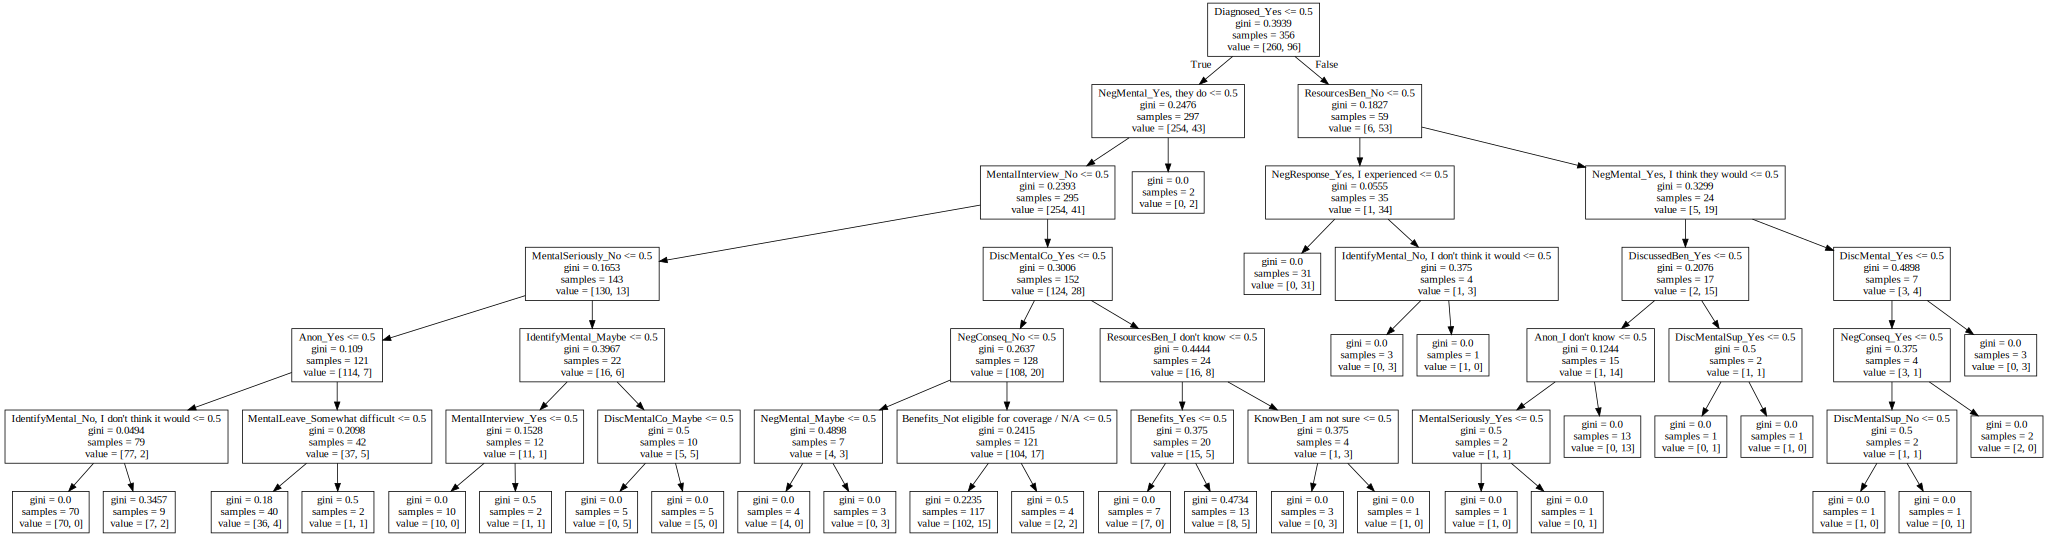

In [10]:
export_graphviz(clf, out_file="treatmentFactors.dot", feature_names=X.columns)
with open("treatmentFactors.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

### Divide into Training and Test

Just out of curiosity

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=0)
clf = DecisionTreeClassifier(max_depth=6)
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

0.93258426966292129